# Analysis of the spread of the coronavirus Covid-19 in US 3/24/2020

By Steve Snively<br>
Data source: Ourworldindata.org<br>
DAYS SINCE THE TOTAL CONFIRMED CASES OF COVID-19 REACHED 100<br>
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

In [1]:
#Load dataset
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("owid-covid-data.csv")

In [8]:
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
5,AFG,Asia,Afghanistan,2020-01-05,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
6,AFG,Asia,Afghanistan,2020-01-06,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
7,AFG,Asia,Afghanistan,2020-01-07,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
8,AFG,Asia,Afghanistan,2020-01-08,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
9,AFG,Asia,Afghanistan,2020-01-09,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [14]:
us = data[data['iso_code']=='USA'][['date','total_cases']]
us = us.rename(columns={"date": "Date", "total_cases": "Cases"})
us.set_index('Date')

,Cases
Date,
2019-12-31,0
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
2020-01-08,0


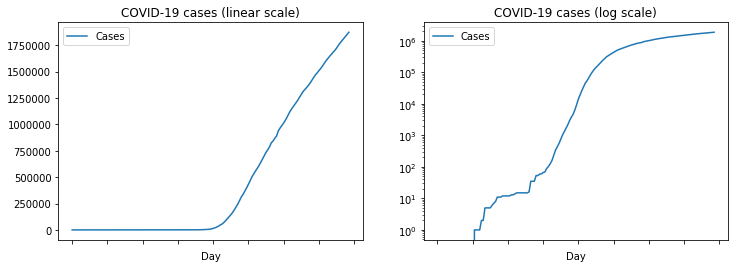

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
us.plot(ax=axes[0], x='Date',y='Cases')
axes[0].set_xlabel('Day')
axes[0].set_title('COVID-19 cases (linear scale)')

us.plot(ax=axes[1], x='Date',y='Cases')
axes[1].set_yscale('log')
axes[1].set_xlabel('Day')
axes[1].set_title('COVID-19 cases (log scale)')

plt.show()

In [16]:
#Calculate the first derivative of cases
us['d1'] = us['Cases'] - us['Cases'].shift(1)

#Calculate the second derivative of cases
us['d2'] = us['d1'] - us['d1'].shift(1)


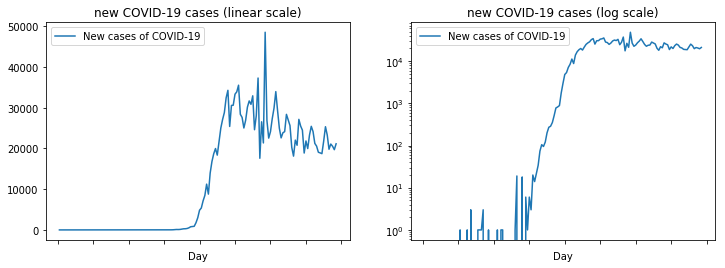

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

us.plot(ax=axes[0], x='Date', y='d1')
axes[0].legend(labels=['New cases of COVID-19'])
axes[0].set_yscale('linear')
axes[0].set_xlabel('Day')
axes[0].set_title('new COVID-19 cases (linear scale)')

us.plot(ax=axes[1], x='Date', y='d1')
axes[1].legend(labels=['New cases of COVID-19'])
axes[1].set_yscale('log')
axes[1].set_xlabel('Day')
axes[1].set_title('new COVID-19 cases (log scale)')

plt.show()


### The new cases are increasing exponentially.
This appears as a straight line in the log scale.  Let's analyze the change in new cases (the 2nd derivative of cases) to determine the acceleration of the trend.

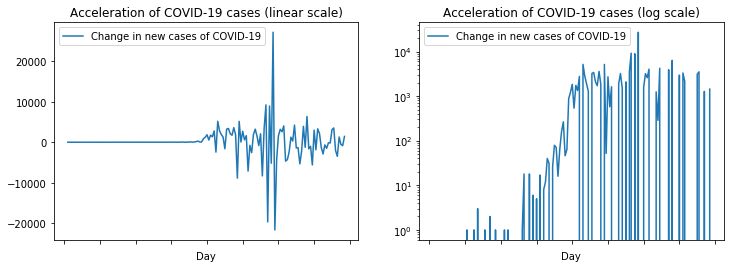

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

us.plot(ax=axes[0], x='Date', y='d2')
axes[0].legend(labels=['Change in new cases of COVID-19'])
axes[0].set_yscale('linear')
axes[0].set_xlabel('Day')
axes[0].set_title('Acceleration of COVID-19 cases (linear scale)')

us.plot(ax=axes[1], x='Date', y='d2')
axes[1].legend(labels=['Change in new cases of COVID-19'])
axes[1].set_yscale('log')
axes[1].set_xlabel('Day')
axes[1].set_title('Acceleration of COVID-19 cases (log scale)')

plt.show()


In [19]:
#Smooth the new cases number, using a 3 day moving average, to try to see the trend in the
#change in new cases.
window=3
us['d1_smooth'] = us['d1'].rolling(window).mean()
us['d2_smooth'] = us['d1_smooth'] - us['d1_smooth'].shift(1)

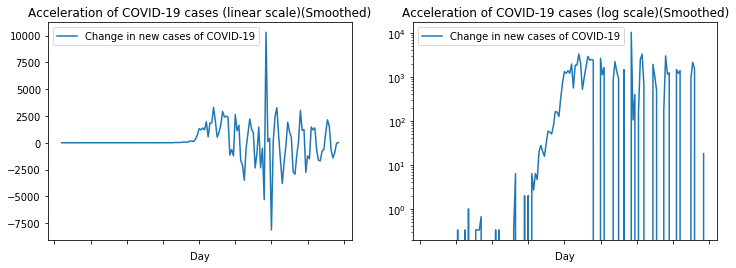

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

us.plot(ax=axes[0], x='Date', y='d2_smooth')
axes[0].legend(labels=['Change in new cases of COVID-19'])
axes[0].set_yscale('linear')
axes[0].set_xlabel('Day')
axes[0].set_title('Acceleration of COVID-19 cases (linear scale)(Smoothed)')

us.plot(ax=axes[1], x='Date', y='d2_smooth')
axes[1].legend(labels=['Change in new cases of COVID-19'])
axes[1].set_yscale('log')
axes[1].set_xlabel('Day')
axes[1].set_title('Acceleration of COVID-19 cases (log scale)(Smoothed)')

plt.show()


## Change in New COVID-19 Cases not Decelerating, Accelerating

_as of March 26th:_

The above chart shows that the change in new COVID-19 cases, the acceleration of cases, is not a fixed amount.  In the log scale it appears linear, which means it is accelerating exponentially.  Exponential growth is expected in the number of cases, or even the number of new cases, but if the effects of the shelter in place directive are effective we should expect to see this line attinuate towards zero logarithmically.